## Classifying the Customers :

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('selected_customers.csv')
print(df.shape)
df.head()

(4327, 15)


,Unnamed: 0,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,0,12347.0,7,224.82,1294.32,615.714286,4310.00,29.540371,20.805104,26.375870,11.237123,12.041531,2,367,0
1,1,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,0.000000,41.953217,38.016069,20.030714,75,358,8
2,2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,10.713778,12.245455,26.506216,4.513101,46.021450,18,18,7
3,3,12350.0,1,334.40,334.40,334.400000,334.40,0.000000,27.900718,48.444976,11.692584,11.961722,310,310,5
4,4,12352.0,7,144.35,840.30,340.815714,2385.71,14.601523,4.071325,15.705178,1.299404,64.322571,36,296,1


### Defining helper function

In [24]:
# code from -> SKLEARN Documentation.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Code from sklearn documentation.
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [6]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
X = df[columns]
Y = df['cluster']

#### Train, Test split

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.8, random_state= 44)

print("Mean of total sample\t: {}".format(Y.mean()))
print("Mean of train set\t: {}".format(ytrain.mean()))
print("Mean of test set\t: {}".format(ytest.mean()))

Mean of total sample	: 2.61890455280795
Mean of train set	: 2.5410404624277456
Mean of test set	: 2.6383593298671286


The mean difference between train and test sample is not so different

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

classes = [i for i in range(10)]

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1501
           1       0.98      0.96      0.97       465
           2       0.75      0.67      0.71         9
           3       0.50      0.25      0.33        24
           4       0.97      1.00      0.98       249
           5       0.98      0.95      0.97       459
           6       0.97      0.94      0.96       295
           7       0.73      0.73      0.73       162
           8       0.96      0.99      0.97       298

    accuracy                           0.94      3462
   macro avg       0.86      0.83      0.84      3462
weighted avg       0.94      0.94      0.94      3462

Confusion matrix, without normalization
[[1437    8    0    0    5    6    7   31    7]
 [  20  445    0    0    0    0    0    0    0]
 [   0    0    6    3    0    0    0    0    0]
 [   5    0    2    6    1    0    0   10    0]
 [   1    0    0    0  248    0    0    0    0]
 [  17    0    

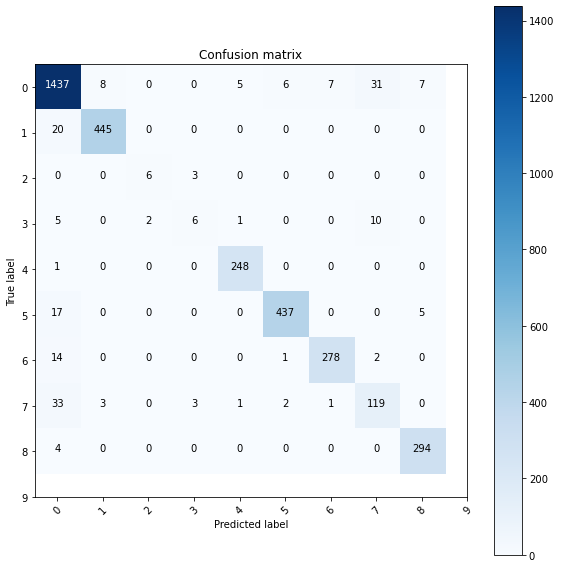

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtest, ytest)
ypred_lr = lr.predict(xtest)
print(classification_report(ytest, ypred_lr))
cm = confusion_matrix(ytest, ypred_lr, )
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes)

<module 'matplotlib.pyplot' from '/home/aisionlab/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

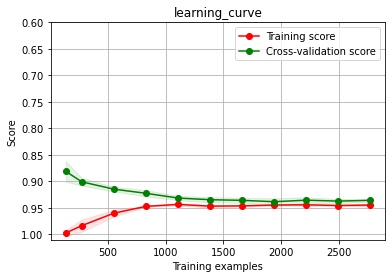

In [50]:
plot_learning_curve(lr, "learning_curve", xtest, ytest, ylim=[1.01, 0.6], cv = 5,
                                            train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


              precision    recall  f1-score   support

           0       0.61      0.98      0.75      1501
           1       0.98      0.63      0.77       465
           2       1.00      0.22      0.36         9
           3       0.54      0.29      0.38        24
           4       1.00      0.32      0.49       249
           5       0.98      0.48      0.64       459
           6       1.00      0.33      0.49       295
           7       0.68      0.77      0.72       162
           8       0.99      0.44      0.61       298

    accuracy                           0.70      3462
   macro avg       0.86      0.49      0.58      3462
weighted avg       0.80      0.70      0.68      3462

Confusion matrix, without normalization
[[1475    1    0    0    0    0    0   25    0]
 [ 170  293    0    0    0    0    0    2    0]
 [   0    0    2    6    0    0    0    1    0]
 [   6    0    0    7    0    0    0   11    0]
 [ 156    1    0    0   80    0    0   11    1]
 [ 237    2    

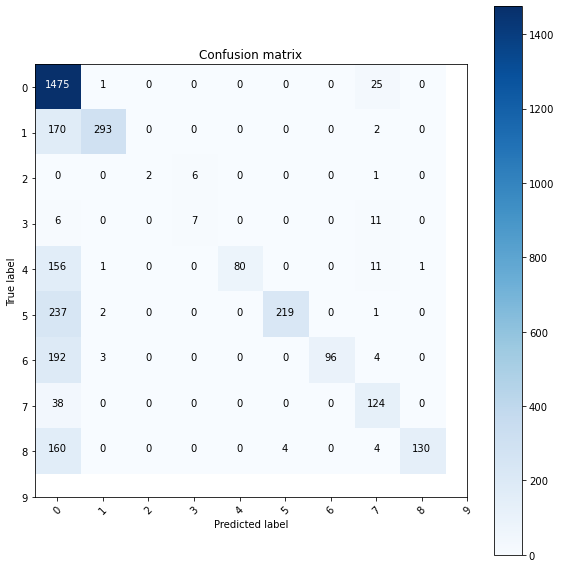

In [35]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtest, ytest)
ypred_svc = svc.predict(xtest)
print(classification_report(ytest, ypred_svc))
cm = confusion_matrix(ytest, ypred_svc )
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes)

<module 'matplotlib.pyplot' from '/home/aisionlab/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

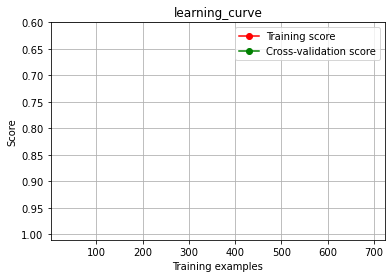

In [54]:
plot_learning_curve(svc, "learning_curve", xtrain, ytrain, ylim=[1.01, 0.6], cv = 5,
                                            train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1501
           1       1.00      1.00      1.00       465
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       459
           6       1.00      1.00      1.00       295
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       298

    accuracy                           1.00      3462
   macro avg       1.00      1.00      1.00      3462
weighted avg       1.00      1.00      1.00      3462

Confusion matrix, without normalization
[[1501    0    0    0    0    0    0    0    0]
 [   0  465    0    0    0    0    0    0    0]
 [   0    0    9    0    0    0    0    0    0]
 [   0    0    0   24    0    0    0    0    0]
 [   0    0    0    0  249    0    0    0    0]
 [   0    0    

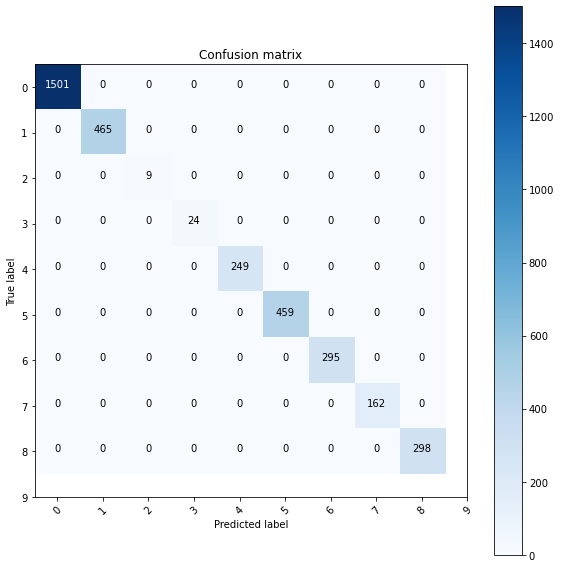

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(xtest, ytest)
ypred_dtree = dtree.predict(xtest)
print(classification_report(ytest, ypred_dtree))
cm = confusion_matrix(ytest, ypred_dtree, )
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes)

<module 'matplotlib.pyplot' from '/home/aisionlab/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

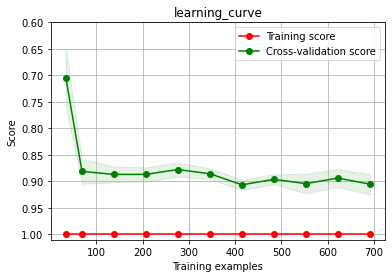

In [56]:
plot_learning_curve(dtree, "learning_curve", xtrain, ytrain, ylim=[1.01, 0.6], cv = 5,
                                            train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1501
           1       1.00      1.00      1.00       465
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       459
           6       1.00      1.00      1.00       295
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       298

    accuracy                           1.00      3462
   macro avg       1.00      1.00      1.00      3462
weighted avg       1.00      1.00      1.00      3462

Confusion matrix, without normalization
[[1501    0    0    0    0    0    0    0    0]
 [   0  465    0    0    0    0    0    0    0]
 [   0    0    9    0    0    0    0    0    0]
 [   0    0    0   24    0    0    0    0    0]
 [   0    0    0    0  249    0    0    0    0]
 [   0    0    

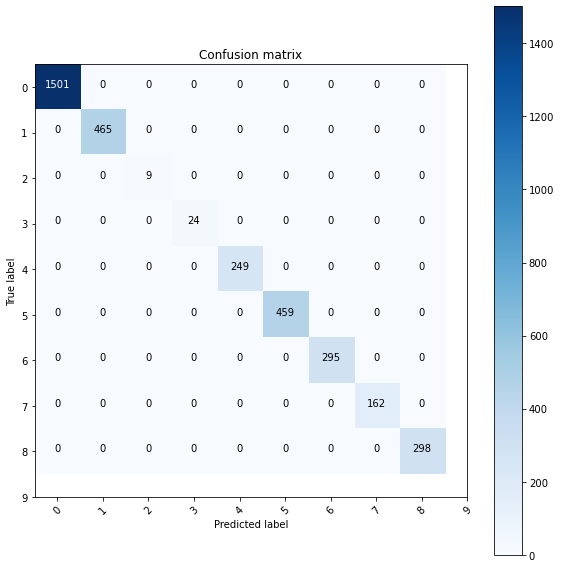

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtest, ytest)
ypred_rfc = rfc.predict(xtest)
print(classification_report(ytest, ypred_rfc))
cm = confusion_matrix(ytest, ypred_rfc, )
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes)

<module 'matplotlib.pyplot' from '/home/aisionlab/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

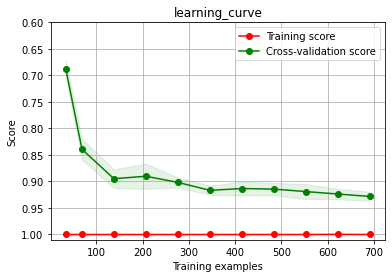

In [57]:
plot_learning_curve(rfc, "learning_curve", xtrain, ytrain, ylim=[1.01, 0.6], cv = 5,
                                            train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1501
           1       1.00      1.00      1.00       465
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       459
           6       1.00      1.00      1.00       295
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       298

    accuracy                           1.00      3462
   macro avg       1.00      1.00      1.00      3462
weighted avg       1.00      1.00      1.00      3462

Confusion matrix, without normalization
[[1501    0    0    0    0    0    0    0    0]
 [   0  465    0    0    0    0    0    0    0]
 [   0    0    9    0    0    0    0    0    0]
 [   0    0    0   24    0    0    0    0    0]
 [   0    0    0    0  249    0    0    0    0]
 [   0    0    

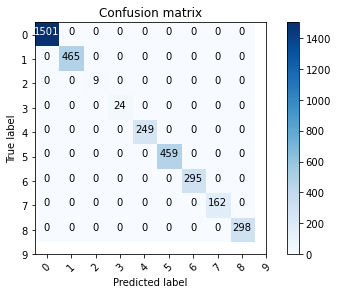

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtest, ytest)
ypred_xgb = xgb.predict(xtest)
print(classification_report(ytest, ypred_xgb))
cm = confusion_matrix(ytest, ypred_xgb, )
plot_confusion_matrix(cm, classes)

<module 'matplotlib.pyplot' from '/home/aisionlab/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

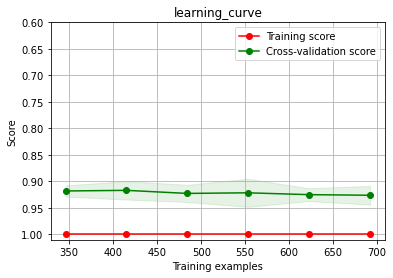

In [62]:
plot_learning_curve(xgb, "learning_curve", xtrain, ytrain, ylim=[1.01, 0.6], cv = 5,
                                            train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


We are getting the f1 score of 1.